In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sns
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder , StandardScaler
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NEURAL NETWORK/gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
cols=data.columns

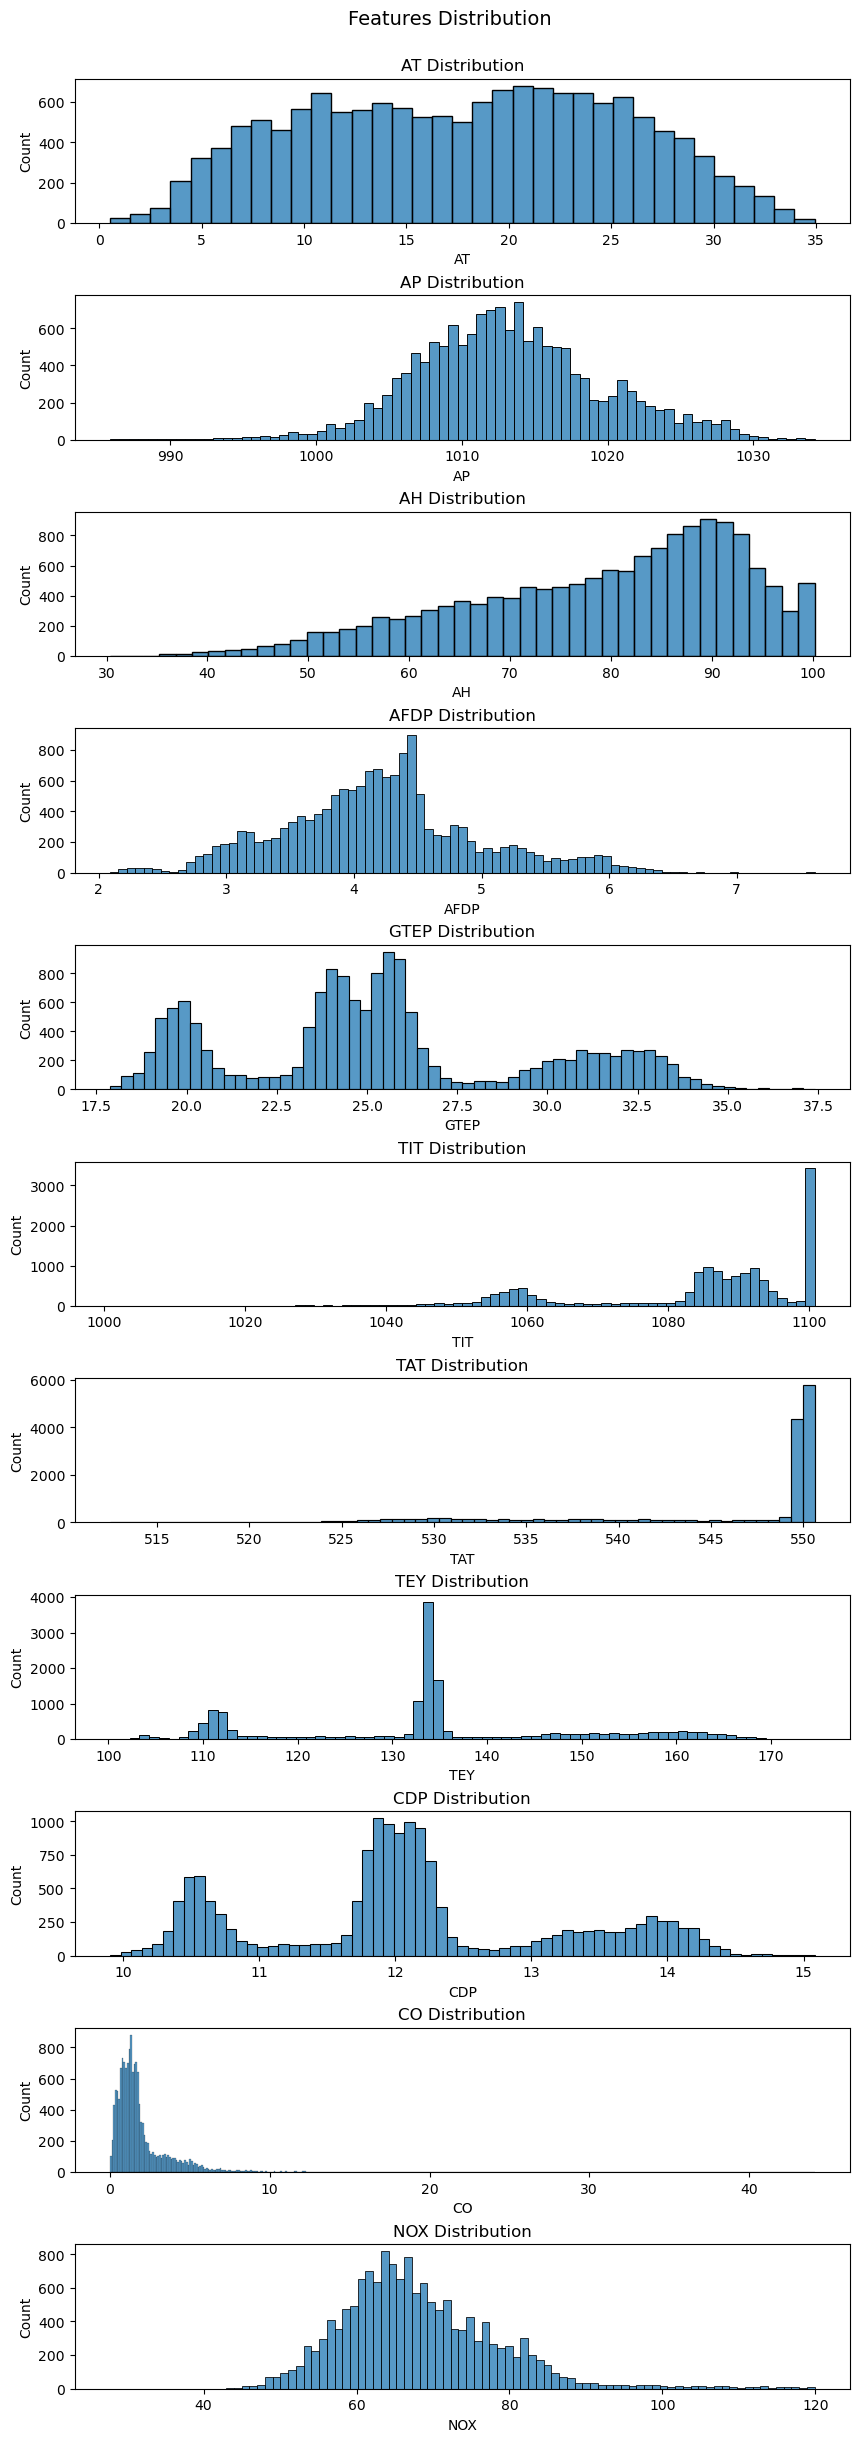

In [6]:
fig, axes=plt.subplots(11,1,figsize=(10,30))
for i,col in enumerate(cols):
    sns.histplot(x=col, data=data, ax=axes[i])
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"{col} Distribution")
fig.text(0.5, 0.9,"Features Distribution",va="center", ha="center", fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

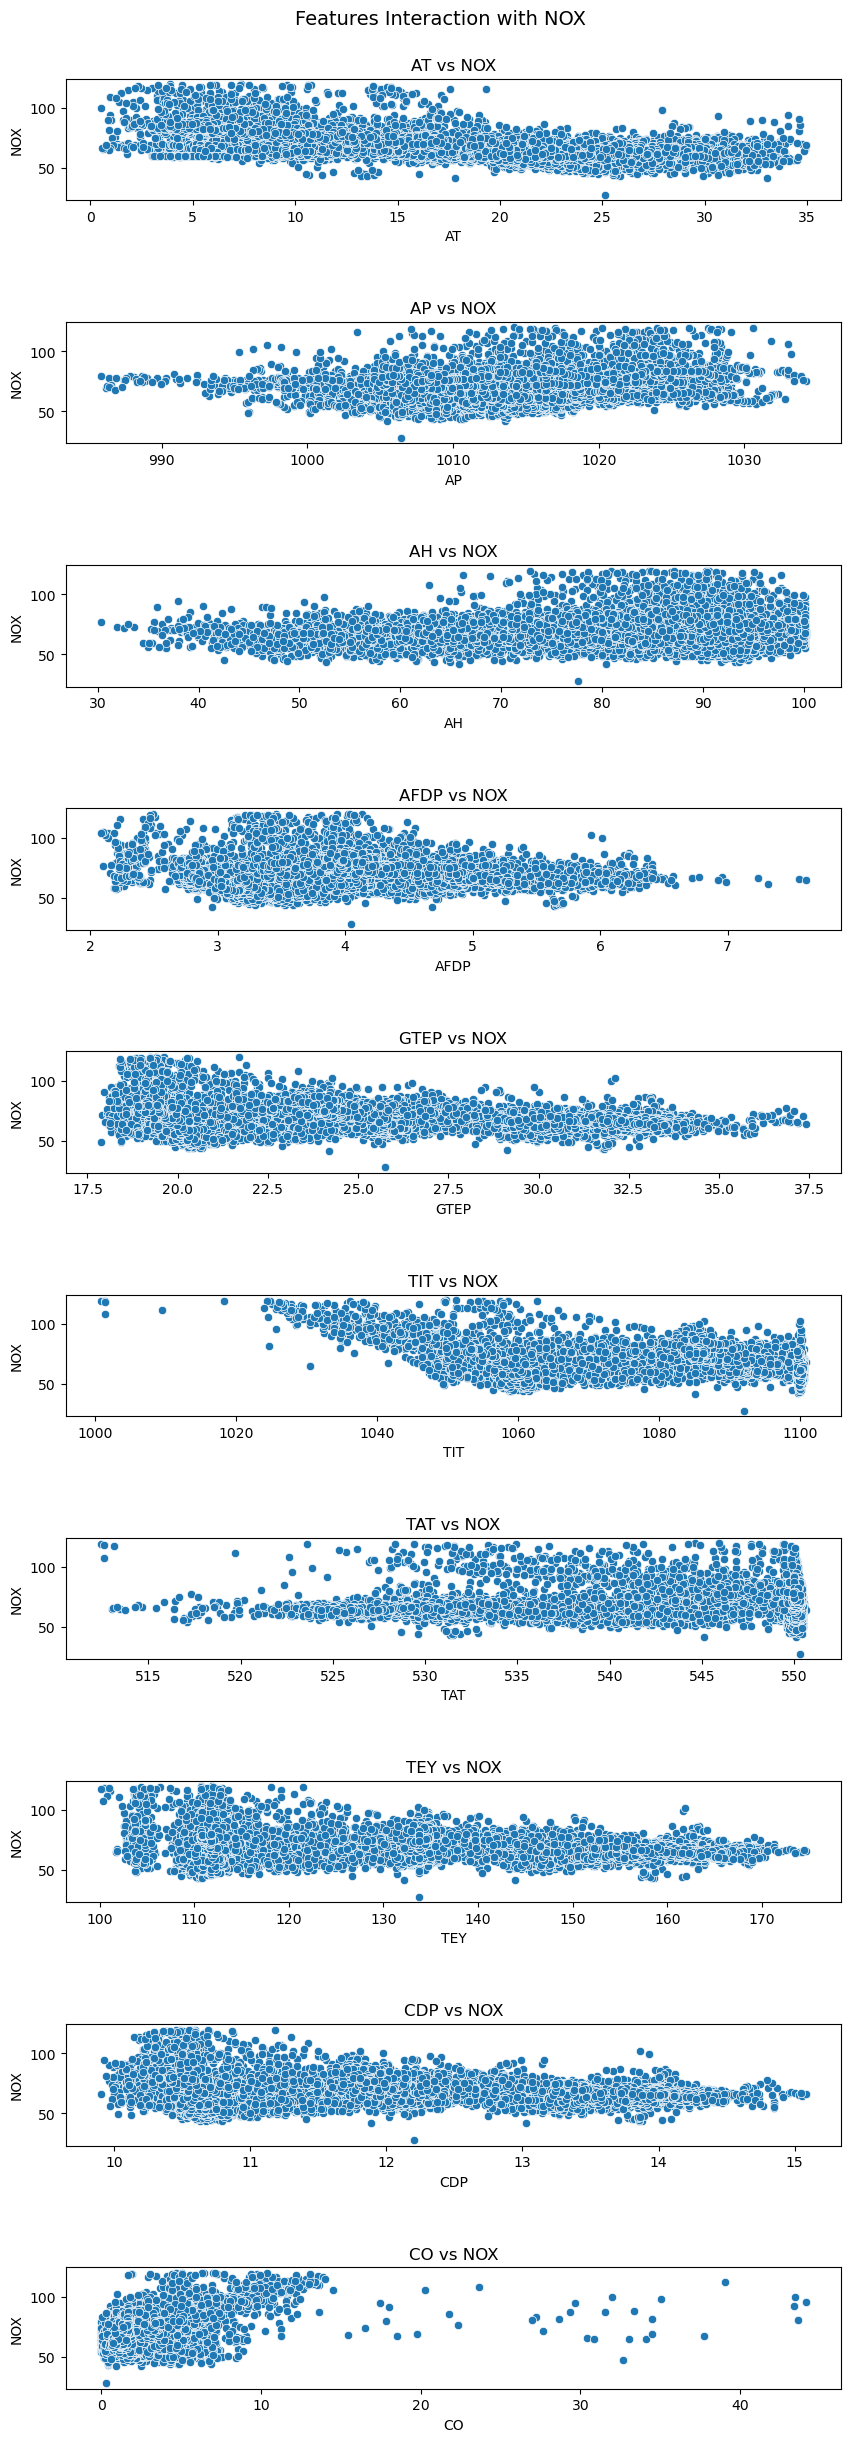

In [7]:
fig, axes=plt.subplots(10,1,figsize=(10,30))
for i,col in enumerate(cols[:-1]):
    sns.scatterplot(x=col,y="NOX", data=data, ax=axes[i])
    axes[i].set_ylabel("NOX")
    axes[i].set_title(f"{col} vs NOX")
fig.text(0.5, 0.9,"Features Interaction with NOX",va="center", ha="center", fontsize=14)
plt.subplots_adjust(hspace=1)
plt.show()

In [11]:
new_data = data.drop(columns = ['AFDP','GTEP','TIT','TAT','TAT','CDP','CO','NOX'])

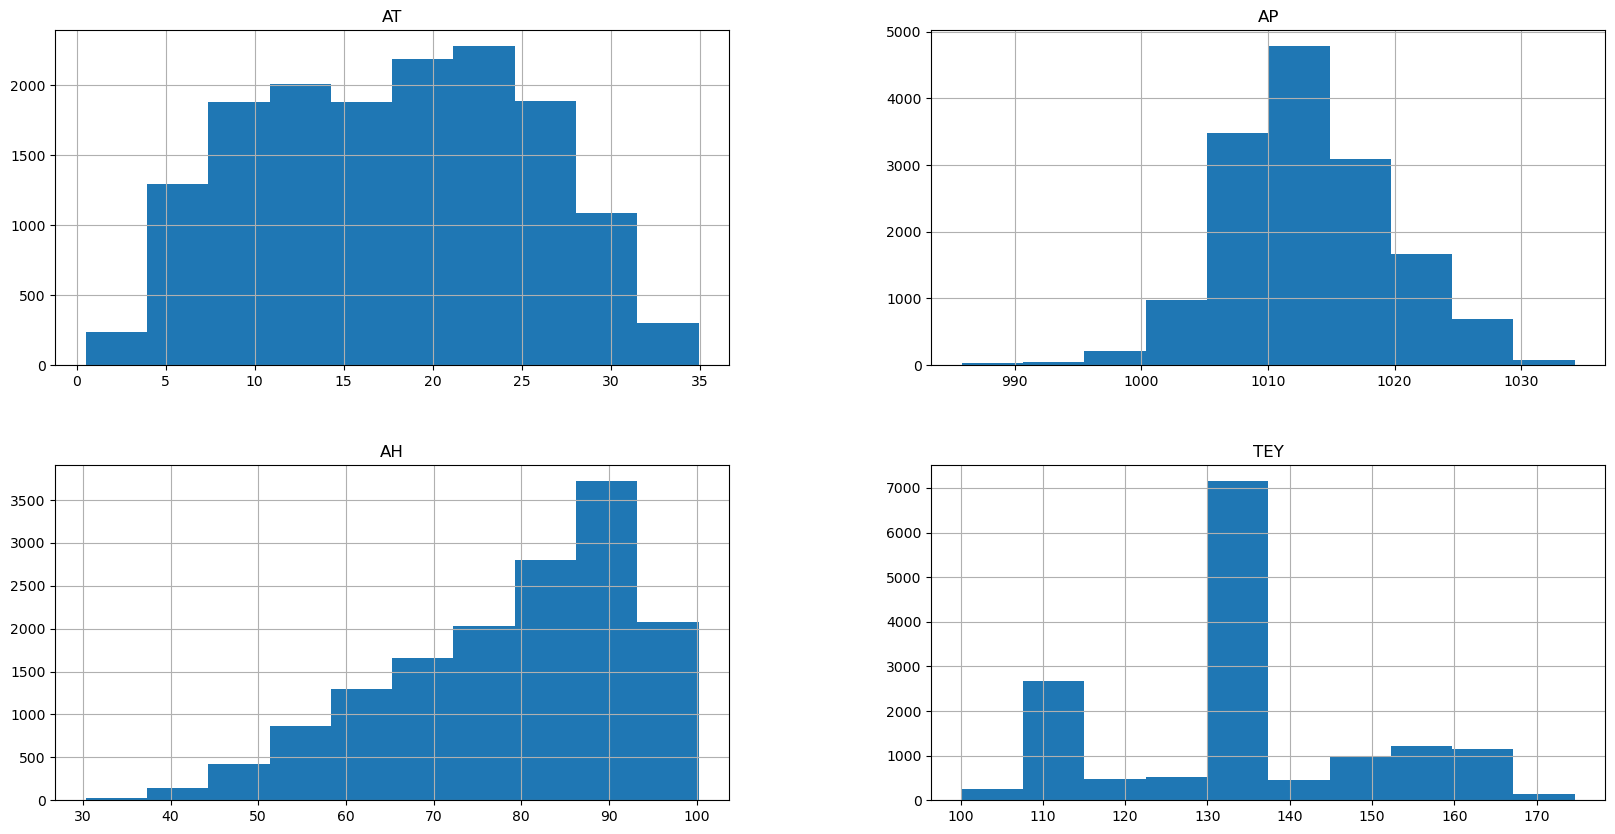

In [12]:
new_data.hist(figsize=(20,10))
plt.show()

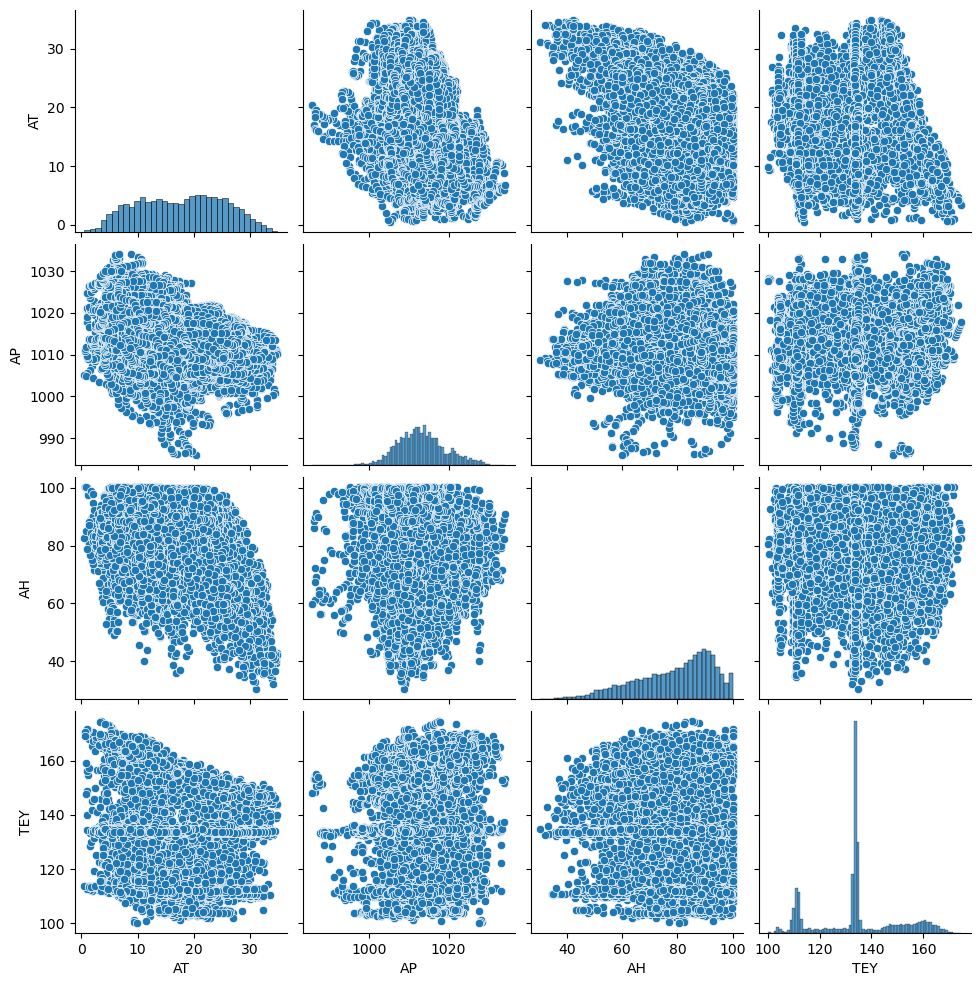

In [13]:

sns.pairplot(new_data)
plt.show()

In [14]:
y = new_data['TEY']
x = new_data.drop(columns='TEY')

In [15]:
scl = StandardScaler()
scl.fit(x)
x_standardized = scl.transform(x)

In [16]:

pd.DataFrame(x_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [17]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam
from keras.layers import Dropout

In [ ]:
def create_model(learning_rate, dropout_rate, activation_function,init, neuron1, neuron2):
  model = Sequential()
  model.add(Dense(neuron1,input_dim=11, kernel_initializer=init, activation = activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer = init, activation = activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation = 'relu'))

  adam = Adam(learning_rate= learning_rate)
  model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
  return model

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
activation_function = ['relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Create the model

model = KerasRegressor(build_fn = create_model, verbose = 0,dropout_rate = dropout_rate, learning_rate = learning_rate,
                       activation_function= activation_function, init = init,neuron1 = neuron1,neuron2 = neuron2)

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size, epochs = epochs, learning_rate = learning_rate,
                   dropout_rate = dropout_rate, activation_function=activation_function, init = init,
                   neuron1 = neuron1, neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(x_standardized, y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))